#  dataset

In [1]:
import os

def process_annotation_file(input_file, output_file, image_folder):
    with open(input_file, 'r', encoding='utf-8') as f_in, open(output_file, 'a', encoding='utf-8') as f_out:
        for line in f_in:
            line = line.strip()
            if line:  # Kiểm tra xem dòng có rỗng không
                try:
                    image_name, label = line.split(maxsplit=1)
                    image_path = os.path.abspath(os.path.join(image_folder, image_name))
                    f_out.write(f"{image_path}\t{label}\n")
                except ValueError:
                    print(f"Dòng không hợp lệ: {line}")
                    continue

# In ra thư mục làm việc hiện tại
print(f"Thư mục làm việc hiện tại: {os.getcwd()}")

# Đường dẫn tuyệt đối của thư mục hiện tại
base_path = os.path.abspath('')
print(f"Đường dẫn tuyệt đối: {base_path}")

# Tạo đường dẫn đến các folder con trong folder dataset
dataset_folders = ['dataset', 'dataset2', 'newdataset', 'Van_dataset','output_images']

# Đường dẫn đến thư mục chứa ảnh
image_folder = [os.path.join(base_path, 'Model', 'dataset', folder) for folder in dataset_folders]

# Kiểm tra sự tồn tại của các thư mục
for folder in image_folder:
    if os.path.exists(folder):
        print(f"Thư mục tồn tại: {folder}")
    else:
        print(f"Thư mục không tồn tại: {folder}")

# Đường dẫn đến thư mục đầu ra
output_folder = os.path.join(base_path, 'Model', 'dataset')
print(f"Thư mục đầu ra: {output_folder}")

# Tạo thư mục đầu ra nếu nó chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

# Đường dẫn đầy đủ cho các file đầu vào
train_input = [os.path.join(folder, 'train.txt') for folder in image_folder]
test_input = [os.path.join(folder, 'test.txt') for folder in image_folder]

print(train_input, test_input)

# Kiểm tra sự tồn tại của các file đầu vào
for file in train_input + test_input:
    if os.path.exists(file):
        print(f"File tồn tại: {file}")
    else:
        print(f"File không tồn tại: {file}")

# Đường dẫn đầy đủ cho các file đầu ra
train_output = os.path.join(output_folder, "train_line_annotation.txt")
test_output = os.path.join(output_folder, "test_line_annotation.txt")

def remove_file_if_exists(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Đã xóa file cũ: {file_path}")
remove_file_if_exists(train_output)
remove_file_if_exists(test_output)

# Xử lý file train.txt
for i in range(len(dataset_folders)):
    process_annotation_file(train_input[i], train_output, image_folder[i])

# Xử lý file test.txt
for i in range(len(dataset_folders)):
    process_annotation_file(test_input[i], test_output, image_folder[i])

print(f"Đã tạo thành công các file trong thư mục: {output_folder}")

Thư mục làm việc hiện tại: d:\PJ\AI_OCR
Đường dẫn tuyệt đối: d:\PJ\AI_OCR
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\dataset
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\dataset2
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\newdataset
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\Van_dataset
Thư mục đầu ra: d:\PJ\AI_OCR\Model\dataset
['d:\\PJ\\AI_OCR\\Model\\dataset\\dataset\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\dataset2\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\newdataset\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\Van_dataset\\train.txt'] ['d:\\PJ\\AI_OCR\\Model\\dataset\\dataset\\test.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\dataset2\\test.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\newdataset\\test.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\Van_dataset\\test.txt']
File tồn tại: d:\PJ\AI_OCR\Model\dataset\dataset\train.txt
File tồn tại: d:\PJ\AI_OCR\Model\dataset\dataset2\train.txt
File tồn tại: d:\PJ\AI_OCR\Model\dataset\newdataset\train.txt
File tồn tại: d:\PJ\AI_OCR\Model\dataset

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [2]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [3]:
current_directory = os.getcwd()
absolute_path = os.path.join(current_directory, 'Model\data', 'my_model.pth')
config = Cfg.load_config_from_file(os.path.join(current_directory,'Model\data','config.yml'))
config['weights'] = absolute_path
config['pretrain'] = absolute_path

In [4]:

dataset_params = {
    'name':'hw',
    'data_root':output_folder,
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
    'batch_size': 8,
    'print_every': 50,
    'valid_every': 50*10,
    'iters': 2000,
    'export': './Model/data/my_model.pth',
    'metrics': 200,
    'early_stopping': {
        'patience': 20,
        'min_delta': 0.001
    },
    'lr_scheduler': {
        'factor': 0.1,
        'patience': 5,
        'verbose': True
    }
}

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
config['dataloader']['num_workers']=0
# config['batch_size'] = 1  # Hoặc một giá trị nhỏ hơn

you can change any of these params in this full list below

In [5]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 0, 'pin_memory': True},
 'dataset': {'data_root': 'd:\\PJ\\AI_OCR\\Model\\dataset',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': 'd:\\PJ\\AI_OCR\\Model\\data\\my_model.pth',
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 8,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'early_stopping': {'patience': 20, 'min_delta': 0.001},
  'export': './Model/data/my_model.pth',
  'iters': 2000,
  'log': './train.log',
  'lr_schedul

You should train model from our pretrained 

In [6]:
import torch

if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU


In [7]:
trainer = Trainer(config, pretrained=True)


C:\Users\M S I\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\M S I\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\vietocr\model\trainer.py:278: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). 

Created dataset with 569 samples



Create valid_hw: 100%|████████████████████████████████████████████| 212/212 [00:03<00:00, 63.86it/s]

Created dataset with 211 samples



valid_hw build cluster: 100%|█████████████████████████████████| 211/211 [00:00<00:00, 211924.84it/s]


Save model configuration for inference, load_config_from_file

In [8]:
print(len(trainer.train_gen.dataset))

569


In [9]:
trainer.config.save(os.path.join(current_directory, 'Model\data','config.yml'))

Visualize your dataset to check data augmentation is appropriate

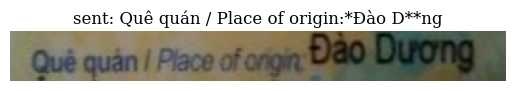

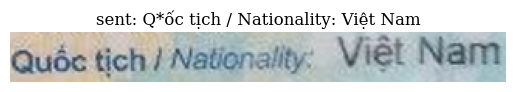

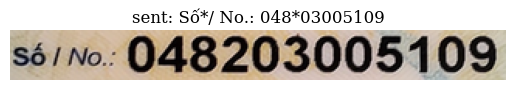

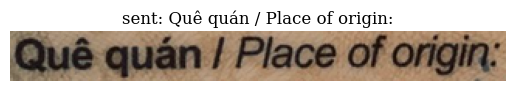

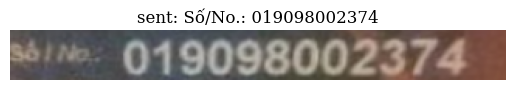

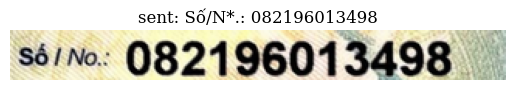

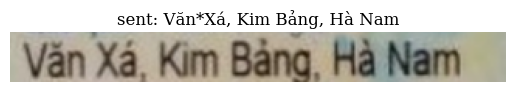

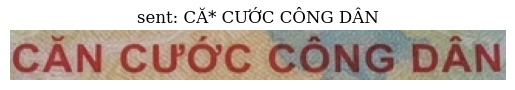

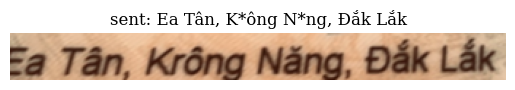

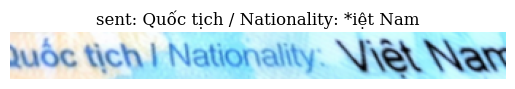

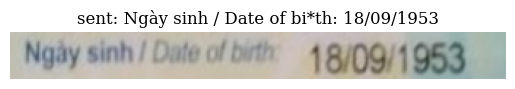

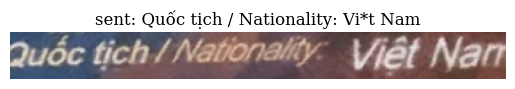

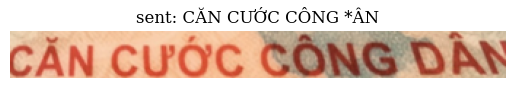

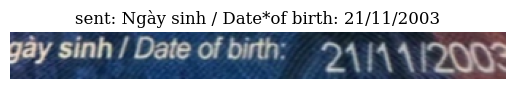

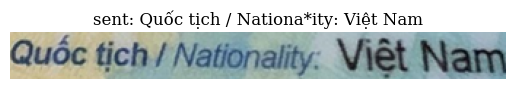

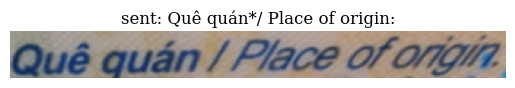

In [10]:
trainer.visualize_dataset()

Train now

In [11]:
print(f"Batch size: {config['trainer']['batch_size']}")


Batch size: 8


In [12]:
trainer.train()

C:\Users\M S I\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


iter: 000050 - train loss: 0.723 - lr: 5.46e-05 - load time: 1.11 - gpu time: 8.79
iter: 000100 - train loss: 0.684 - lr: 1.57e-04 - load time: 1.10 - gpu time: 6.57
iter: 000150 - train loss: 0.674 - lr: 2.59e-04 - load time: 1.00 - gpu time: 6.29
iter: 000200 - train loss: 0.684 - lr: 3.00e-04 - load time: 0.96 - gpu time: 6.34
iter: 000250 - train loss: 0.671 - lr: 2.99e-04 - load time: 0.90 - gpu time: 5.93
iter: 000300 - train loss: 0.686 - lr: 2.98e-04 - load time: 1.02 - gpu time: 6.30
iter: 000350 - train loss: 0.682 - lr: 2.95e-04 - load time: 0.93 - gpu time: 6.04
iter: 000400 - train loss: 0.684 - lr: 2.91e-04 - load time: 0.98 - gpu time: 6.18
iter: 000450 - train loss: 0.673 - lr: 2.86e-04 - load time: 0.90 - gpu time: 6.16
iter: 000500 - train loss: 0.664 - lr: 2.80e-04 - load time: 0.91 - gpu time: 6.03
iter: 000500 - valid loss: 0.656 - acc full seq: 0.7812 - acc per char: 0.9157
iter: 000550 - train loss: 0.687 - lr: 2.73e-04 - load time: 0.86 - gpu time: 5.99
iter: 00

Visualize prediction from our trained model


Compute full seq accuracy for full valid dataset